**Name:- Konkal Kailash Venkatesh**

**Batch No:- DS2312**

**Project:- Zomato Restaurant Project**

In [1]:
# import neccessary librarries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings # filter warnings
warnings.filterwarnings('ignore')

In [9]:
df1=pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Z_Restaurant/zomato.csv", encoding='latin1')
df2=pd.read_excel(r"C:\Users\SHAILESH\Downloads\Country-Code.xlsx")
data = pd.merge(df1,df2, on='Country Code', how='left')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [10]:
print('No. of rows',data.shape[0])
print('No. of columns',data.shape[1])

No. of rows 9551
No. of columns 22


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

From the above observation, we can say that

* Datasets contains 9551 rows and 22 columns.
* Some of features are with object datatype, int64 and other with float.

# Statistical Analysis


Before going for statistical exploration of data, first check integrity of data & missing value.

#### Data Integrity check

Let Check if any whitespace,'?' 'NA' or '-' exist in datasets

In [12]:
data.isin([' ','NA','-','?']).sum().any()

False

In [13]:
data.isin([' ','NA','-']).sum().any()

False

In [14]:
data.isin(['?']).sum().any()

False

No Whitespacen, NA, '-' exist in datset.

#### Since dataset is large lets check for any entry whic is repeated or duplicated in datasets.

In [15]:
data.duplicated().sum()

0

No duplicate Entry present in data.

# Start with looking at missing values

# Missing Vaule Check

In [16]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

                      Missing_values  %Missing values
Cuisines                           9         0.094231
Restaurant ID                      0         0.000000
Has Table booking                  0         0.000000
Votes                              0         0.000000
Rating text                        0         0.000000
Rating color                       0         0.000000
Aggregate rating                   0         0.000000
Price range                        0         0.000000
Switch to order menu               0         0.000000
Is delivering now                  0         0.000000
Has Online delivery                0         0.000000
Currency                           0         0.000000
Restaurant Name                    0         0.000000
Average Cost for two               0         0.000000
Latitude                           0         0.000000
Longitude                          0         0.000000
Locality Verbose                   0         0.000000
Locality                    

# Missing Value Imputation

In [17]:
data['Cuisines']=data['Cuisines'].fillna("No Cuisines")

We cannot fill NaN values like that only by mode because every country have it own dishes which may not be provided in another country...So we will fill it with no dishes.

# Missing Value Checked After Imputation

In [18]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

                      Missing_values  %Missing values
Restaurant ID                      0              0.0
Restaurant Name                    0              0.0
Votes                              0              0.0
Rating text                        0              0.0
Rating color                       0              0.0
Aggregate rating                   0              0.0
Price range                        0              0.0
Switch to order menu               0              0.0
Is delivering now                  0              0.0
Has Online delivery                0              0.0
Has Table booking                  0              0.0
Currency                           0              0.0
Average Cost for two               0              0.0
Cuisines                           0              0.0
Latitude                           0              0.0
Longitude                          0              0.0
Locality Verbose                   0              0.0
Locality                    

<Axes: >

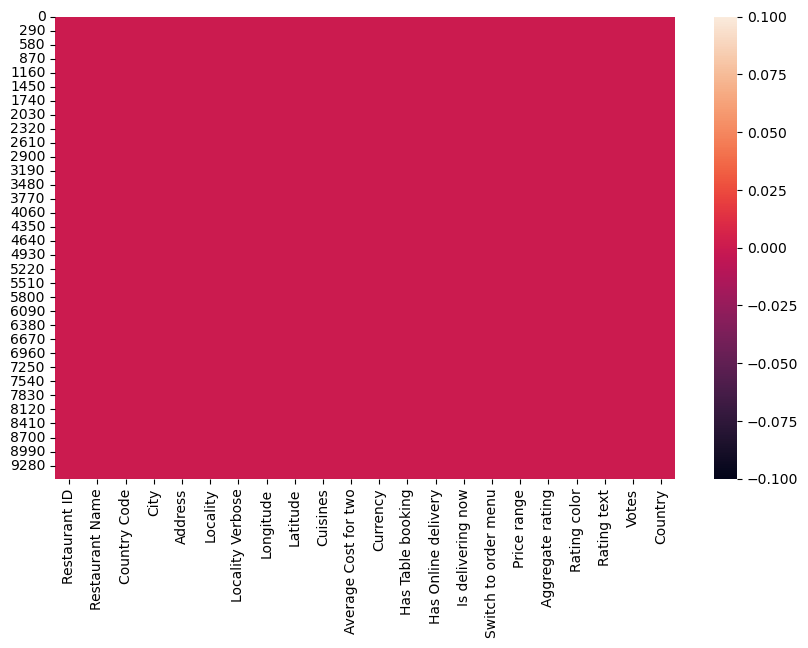

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())

#### Hence we can see now there are no Missing values present

In [20]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Restaurant ID', 'Country Code', 'Average Cost for two', 'Price range', 'Votes'], float64: ['Longitude', 'Latitude', 'Aggregate rating'], object: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']}

# Value Counts


In [21]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n\n')
    print('*'*100)

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64



****************************************************************************************************
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64



****************************************************************************************************
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code,

In [22]:
# Dropping Address column because this column will not make any sense

data.drop('Address',axis = 1, inplace = True)

In [23]:
# We can also drop restuarant id because they have only number count

data.drop('Restaurant ID',axis = 1, inplace=True)

# Spliting feature in categorial and numerical features

In [24]:
Category = ['Restaurant Name', 'City', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking',
            'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']

Numerical = ['Country Code', 'Average Cost for two', 'Price range', 'Votes','Longitude', 'Latitude', 'Aggregate rating']

# Statstical Matrix

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Country Code,9551.0,18.365616,56.750546,1.000000,1.000000,1.000000,1.000000,216.000000
Longitude,9551.0,64.126574,41.467058,-157.948486,77.081343,77.191964,77.282006,174.832089
Latitude,9551.0,25.854381,11.007935,-41.330428,28.478713,28.570469,28.642758,55.976980
Average Cost for two,9551.0,1199.210763,16121.183073,0.000000,250.000000,400.000000,700.000000,800000.000000
Price range,9551.0,1.804837,0.905609,1.000000,1.000000,2.000000,2.000000,4.000000
Aggregate rating,9551.0,2.666370,1.516378,0.000000,2.500000,3.200000,3.700000,4.900000
Votes,9551.0,156.909748,430.169145,0.000000,5.000000,31.000000,131.000000,10934.000000


# Regression Target features- Average Cost for two

In [26]:
print("Minimum Average Cost For Two People -:",data["Average Cost for two"].min())
print("Maximum Average Cost For Two People -:",data["Average Cost for two"].max())
print("Average Cost For Two People -:",data["Average Cost for two"].mean())

Minimum Average Cost For Two People -: 0
Maximum Average Cost For Two People -: 800000
Average Cost For Two People -: 1199.2107632708617


# EDA

#### Lets Group by 4 columns which relates to each other.

In [27]:
a = data.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
a

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


#### The above information help us to understand the relation between Aggregate rating, color and text. We conclude the following color assigned to the ratings:-

* **Rating 0- White- Not Rated**
* **Rating 1.8 to 2.4 -Red-Poor**
* **Rating 2.5 to 3.4-Orange-Average**
* **Rating 3.5 to 3.9-Yellow-Good**
* **Rating 4.0 to 4.4-Green-Very Good**
* **Rating 4.5 to 4.9- Dark Green-Excellent**

In [28]:
# Checking the list of counts of target

data['Aggregate rating'].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [29]:
data['Aggregate rating'].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

#### So we can say that it is regression problem and there are diffrent value counts of target variable

In [30]:
# check weather the target variable contain any space.

data.loc[data['Average Cost for two']==" "]

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country


#### There is no space present in the dataset.

In [31]:
No_rating = data[data['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating

,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


* Indian seems to be maximum unrated restaurants.In india the culture of ordering online food is still gainig momentum hence most of the restaurants are still unrated on Zomato as people might be preferring to visiting the restuarant for a meal.

In [32]:
Max_rating = data[data['Rating color']=='Dark Green'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
Max_rating

,Country,Rating Count
0,Australia,1
1,Brazil,16
2,India,116
3,Indonesia,7
4,New Zealand,12
5,Phillipines,12
6,Qatar,4
7,South Africa,12
8,Sri Lanka,2
9,Turkey,10


#### Max rating restuarant are also found in india.This may be because india has the maximum restuarant listed on zomato from all over the world.

In [33]:
Country_currency = data[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count',axis = 1, inplace=False)
Country_currency.sort_values('Currency').reset_index(drop=True)

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,Australia,Dollar($)
3,Canada,Dollar($)
4,Singapore,Dollar($)
5,United States,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


#### I have done groupby Country and their Currency.

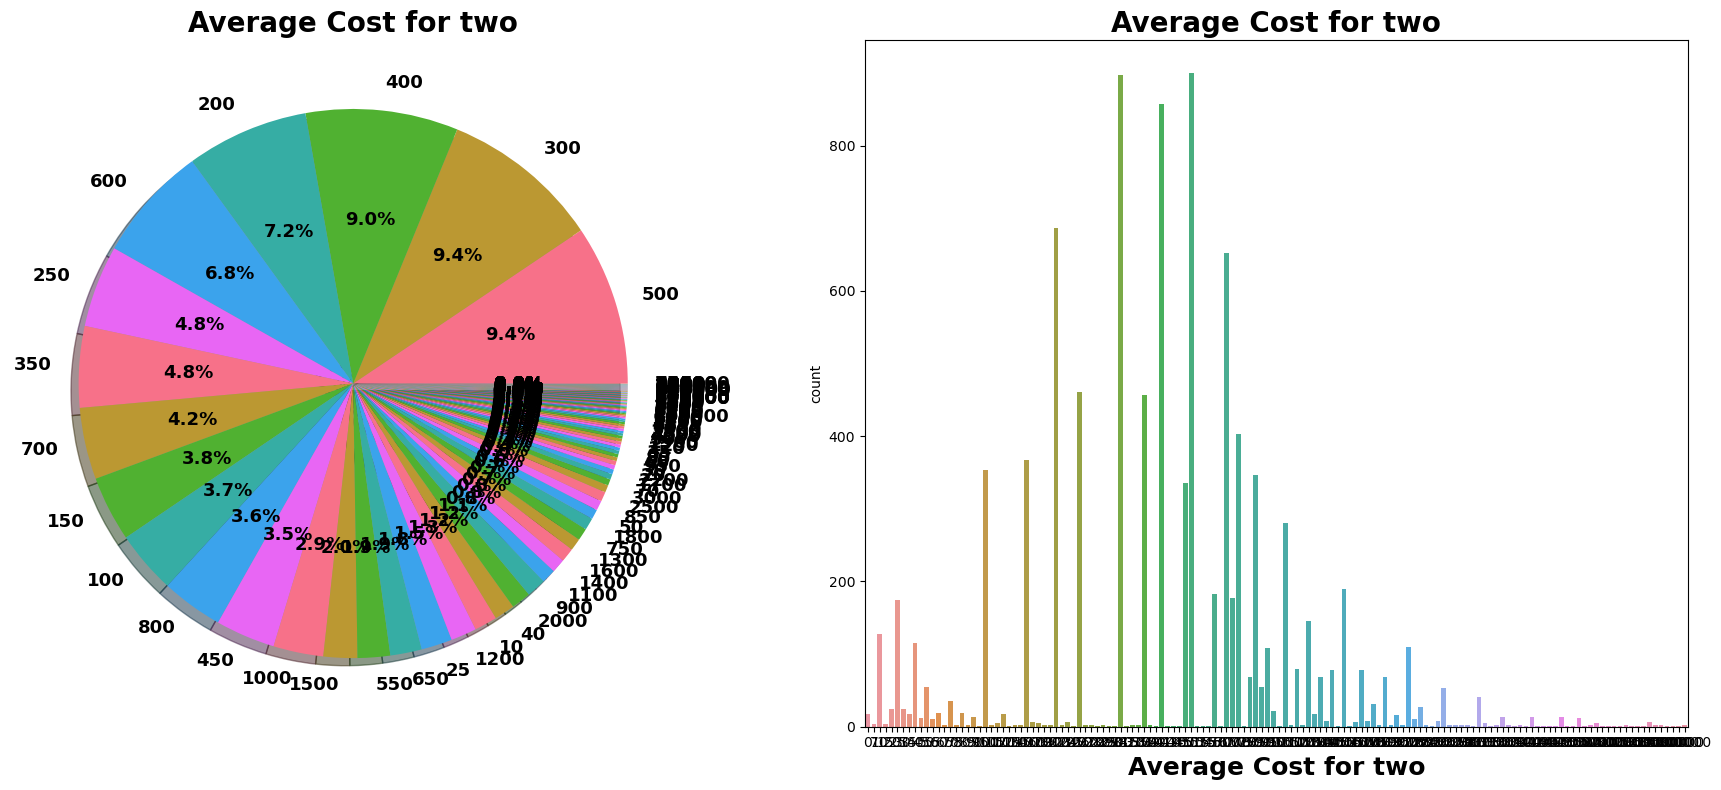

In [34]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Average Cost for two'].value_counts().plot.pie(autopct='%2.1f%%',textprops={'fontweight': 'bold', 'fontsize':13}, ax=ax[0],shadow=True)

ax[0].set_title('Average Cost for two',fontsize=20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Average Cost for two', data=data,ax=ax[1])
ax[1].set_title('Average Cost for two', fontsize=20,fontweight='bold')
ax[1].set_xlabel("Average Cost for two", fontsize=18, fontweight='bold')
plt.show()

In [35]:
data['Average Cost for two'].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64

#### Maximum Cost is 800000 and Minimum Cost is 0

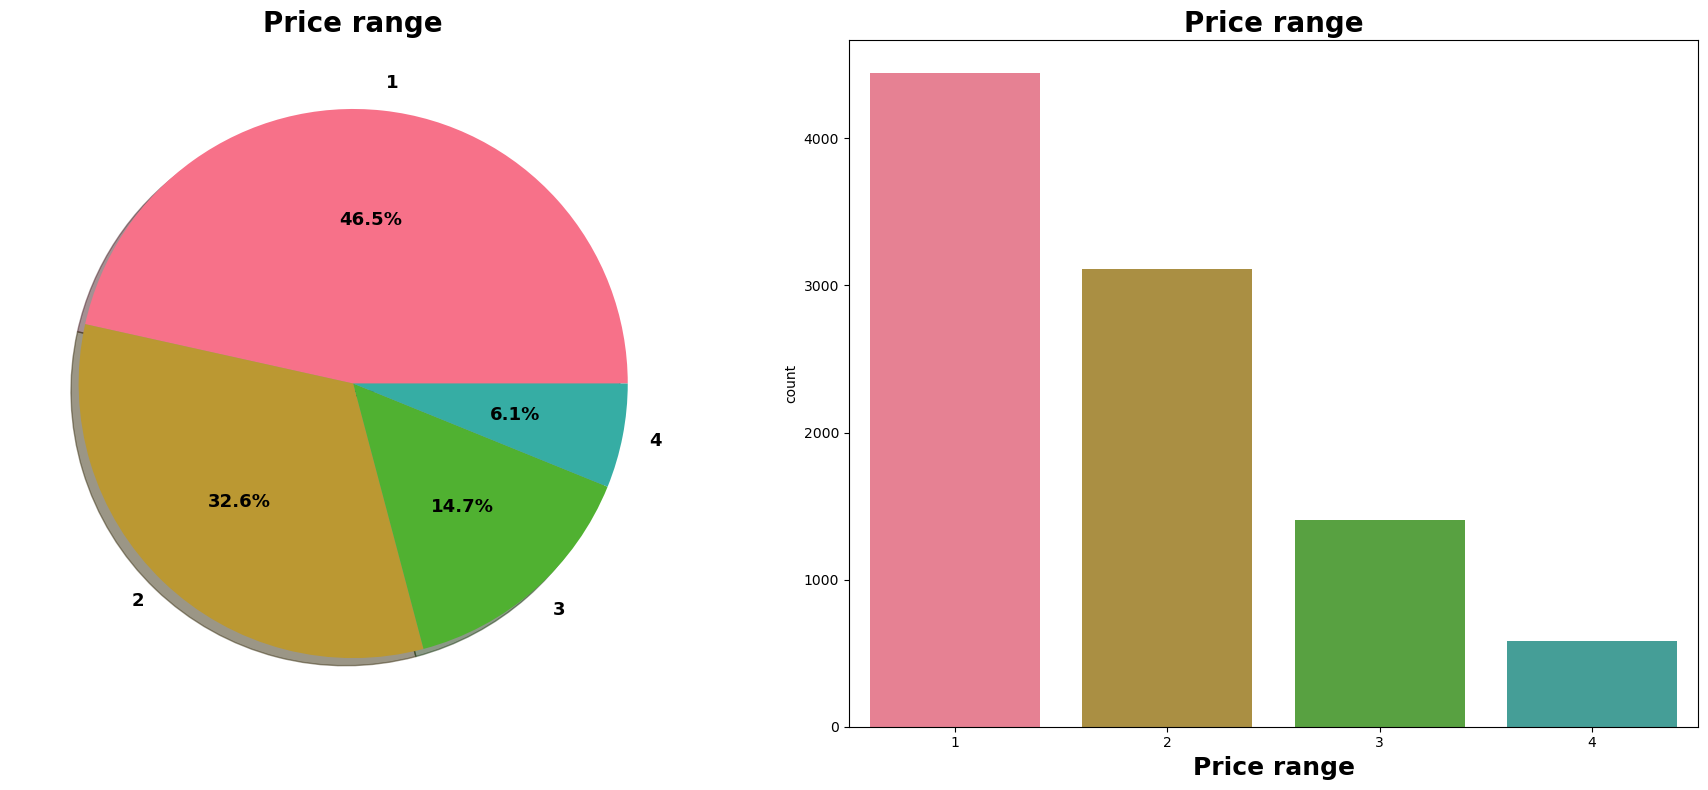

In [36]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Price range'].value_counts().plot.pie(autopct='%2.1f%%',textprops={'fontweight': 'bold', 'fontsize':13}, ax=ax[0],shadow=True)

ax[0].set_title('Price range',fontsize=20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Price range', data=data,ax=ax[1])
ax[1].set_title('Price range', fontsize=20,fontweight='bold')
ax[1].set_xlabel("Price range", fontsize=18, fontweight='bold')
plt.show()

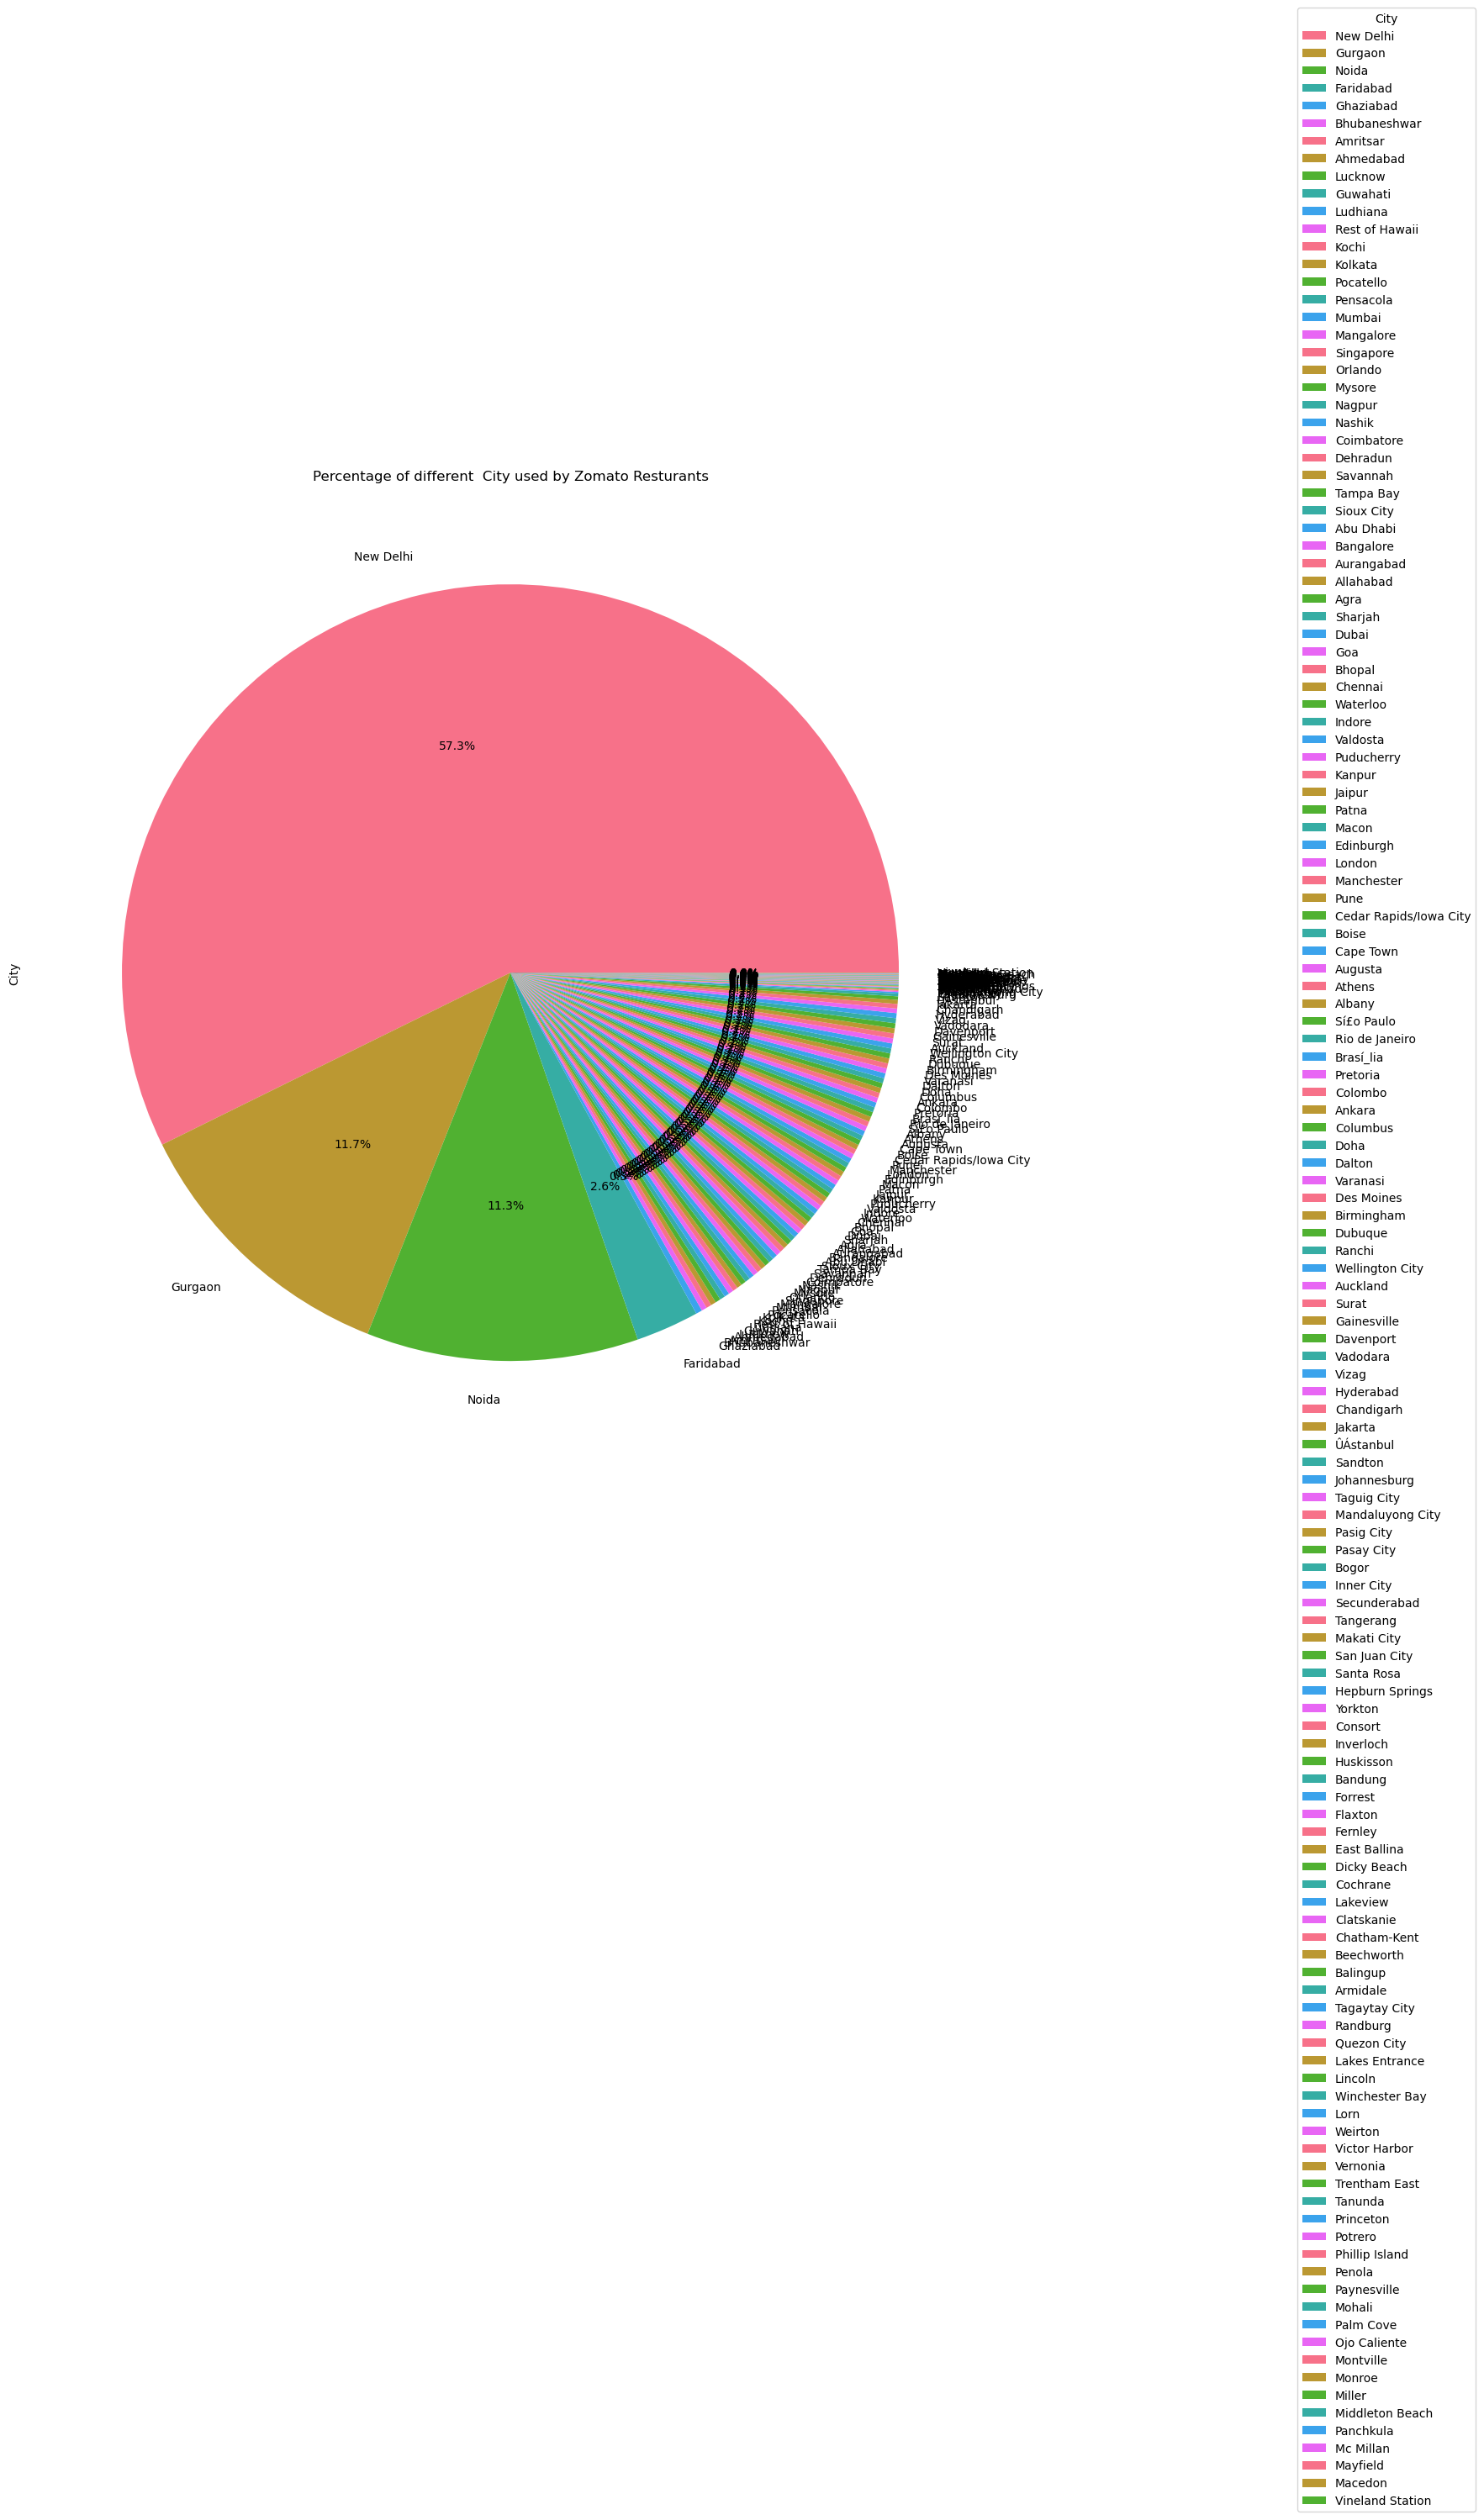

In [37]:
(data['City'].value_counts()).plot(kind='pie',autopct='%1.1f%%', figsize=(30,15))
plt.legend(title='City',loc='best',bbox_to_anchor=(1,0.5,0.5,1))
plt.title("Percentage of different  City used by Zomato Resturants")
plt.tight_layout()
plt.show()

#### We can see that maximum city which is used in New Delhi and the least is vineland situations.

In [38]:
data.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

#### Now, we will see India has maximum count in all the dataset.

In [39]:
data['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

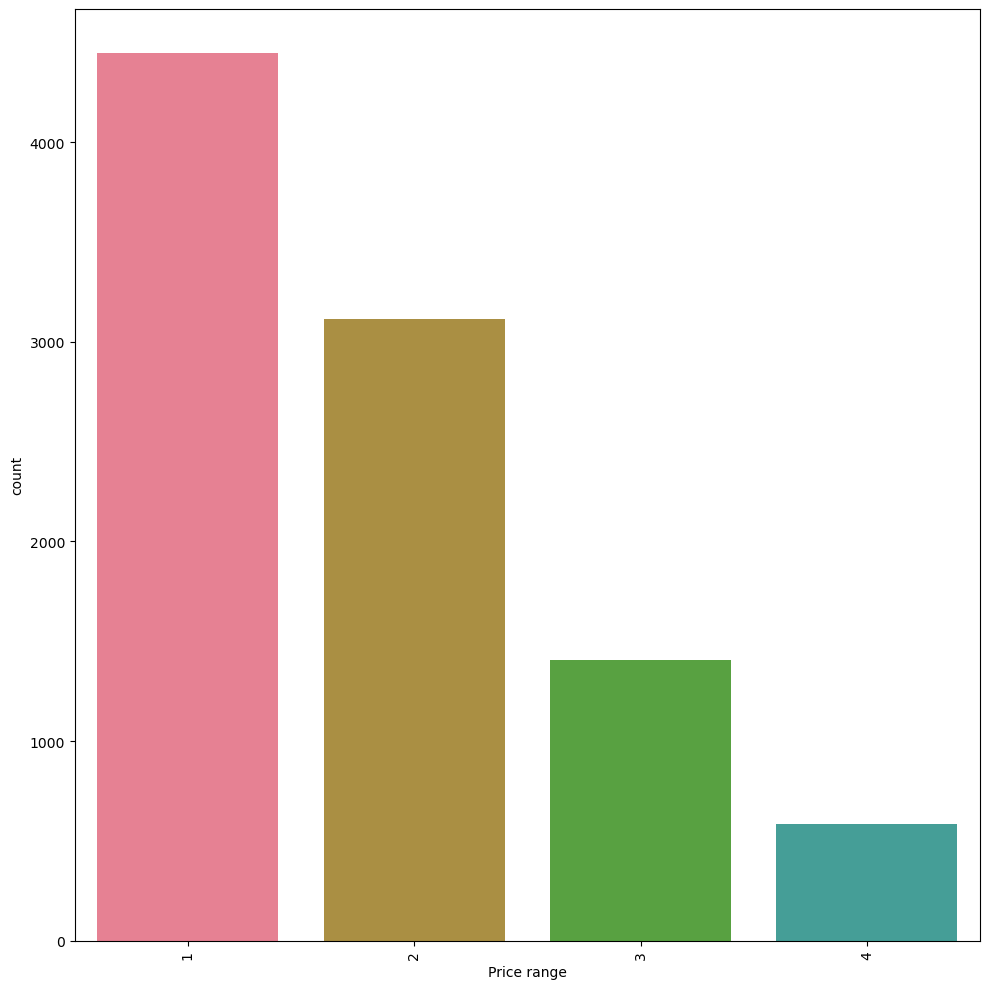

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(x='Price range',data=data)
plt.xticks(rotation=90)
plt.show()

From the above observtion we can see that the price range 1 is max in number.

In [41]:
def piee(i):
    plt.figure(figsize=(10,5), facecolor = 'orange')
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%', shadow=True)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

In [42]:
b = ['Has Table booking','Has Online delivery','Is delivering now','Price range','Rating color', 'Rating text']

Pie Plot for the column: Has Table booking


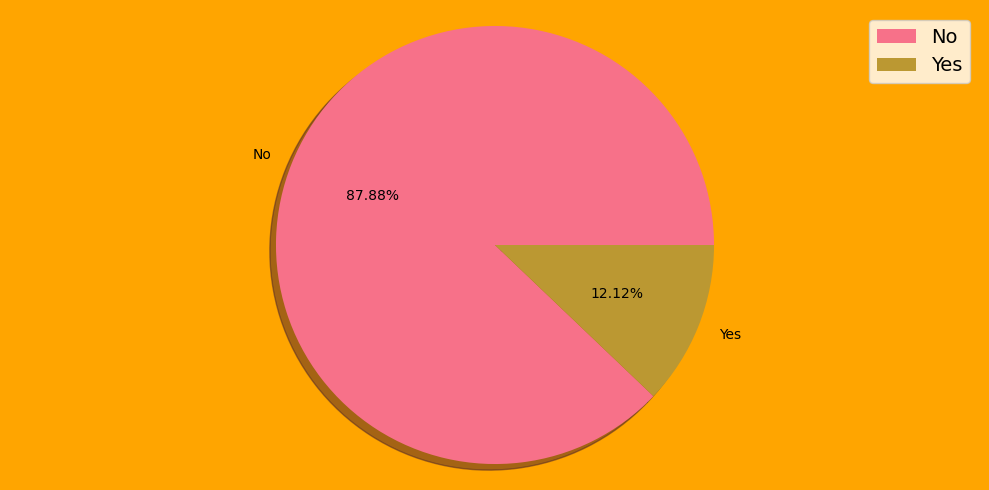

Pie Plot for the column: Has Online delivery


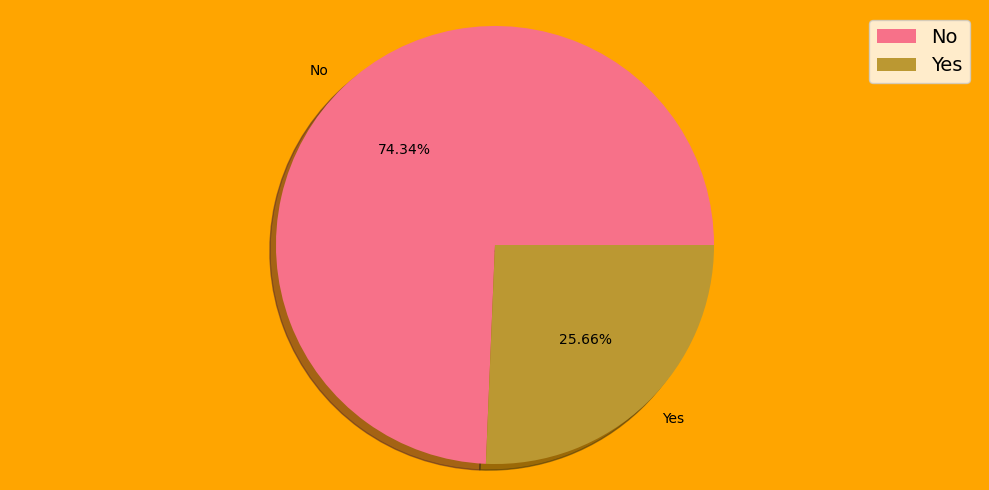

Pie Plot for the column: Is delivering now


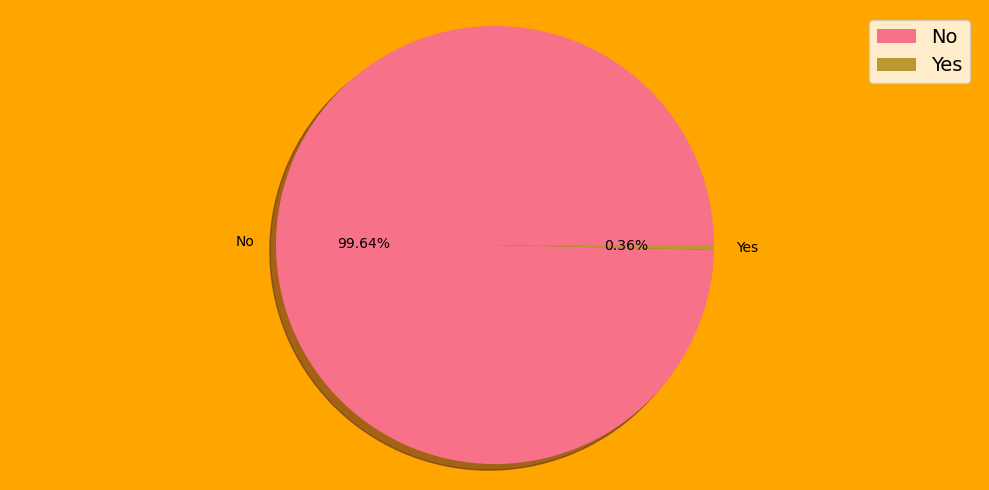

Pie Plot for the column: Price range


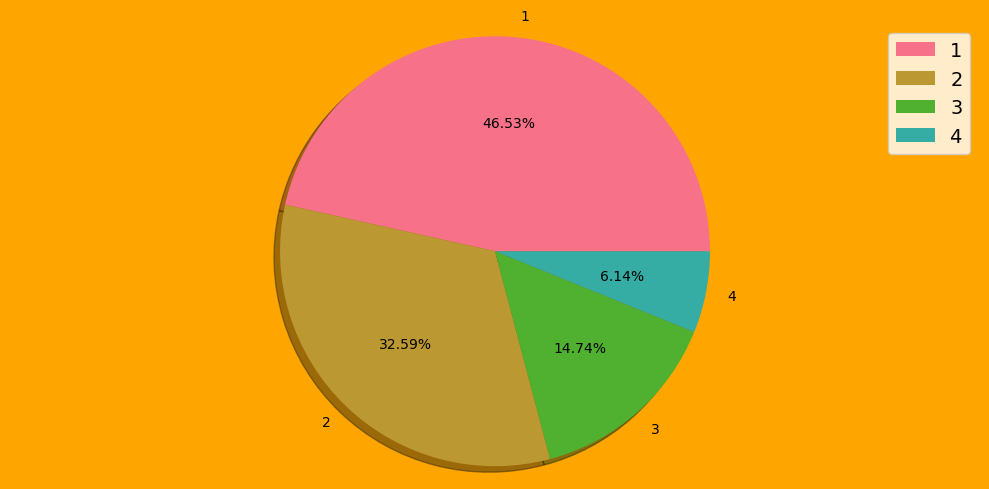

Pie Plot for the column: Rating color


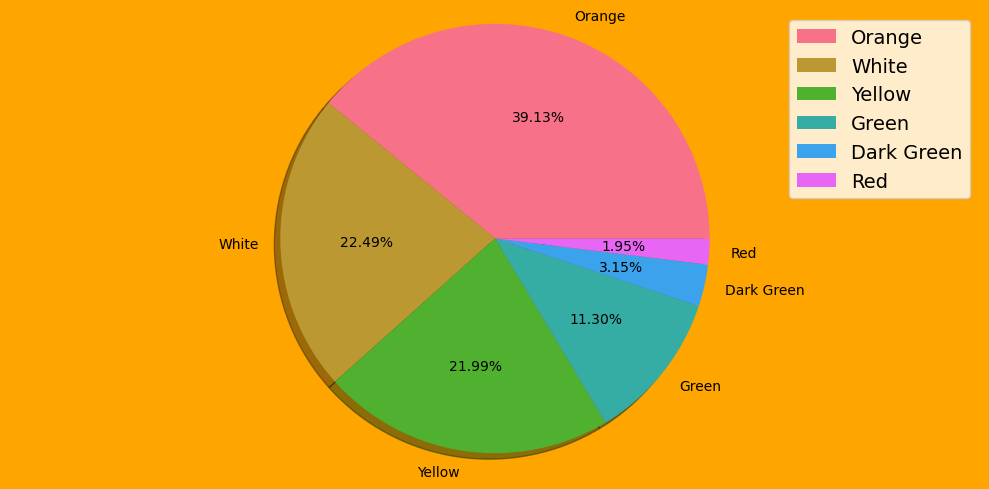

Pie Plot for the column: Rating text


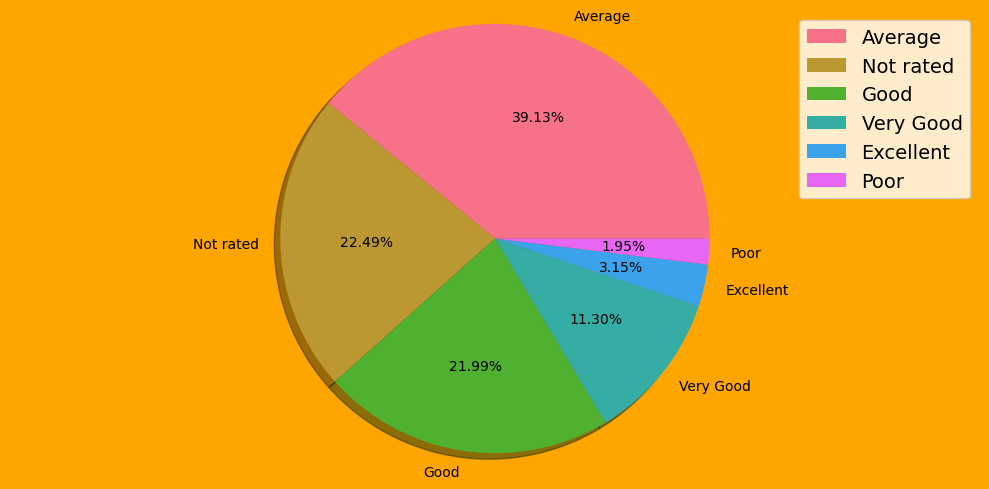

In [43]:
plotnumber = 1
for p in data[b]:
    print(f"Pie Plot for the column:", p)
    piee(data[p])

The above observation say that

* Online delivery very less in india.
* Very less company are delivery now.
* Maximum price range is 1
* Rating color Orange in maximum
* Rating text is maximum Average.

# Distribution of features

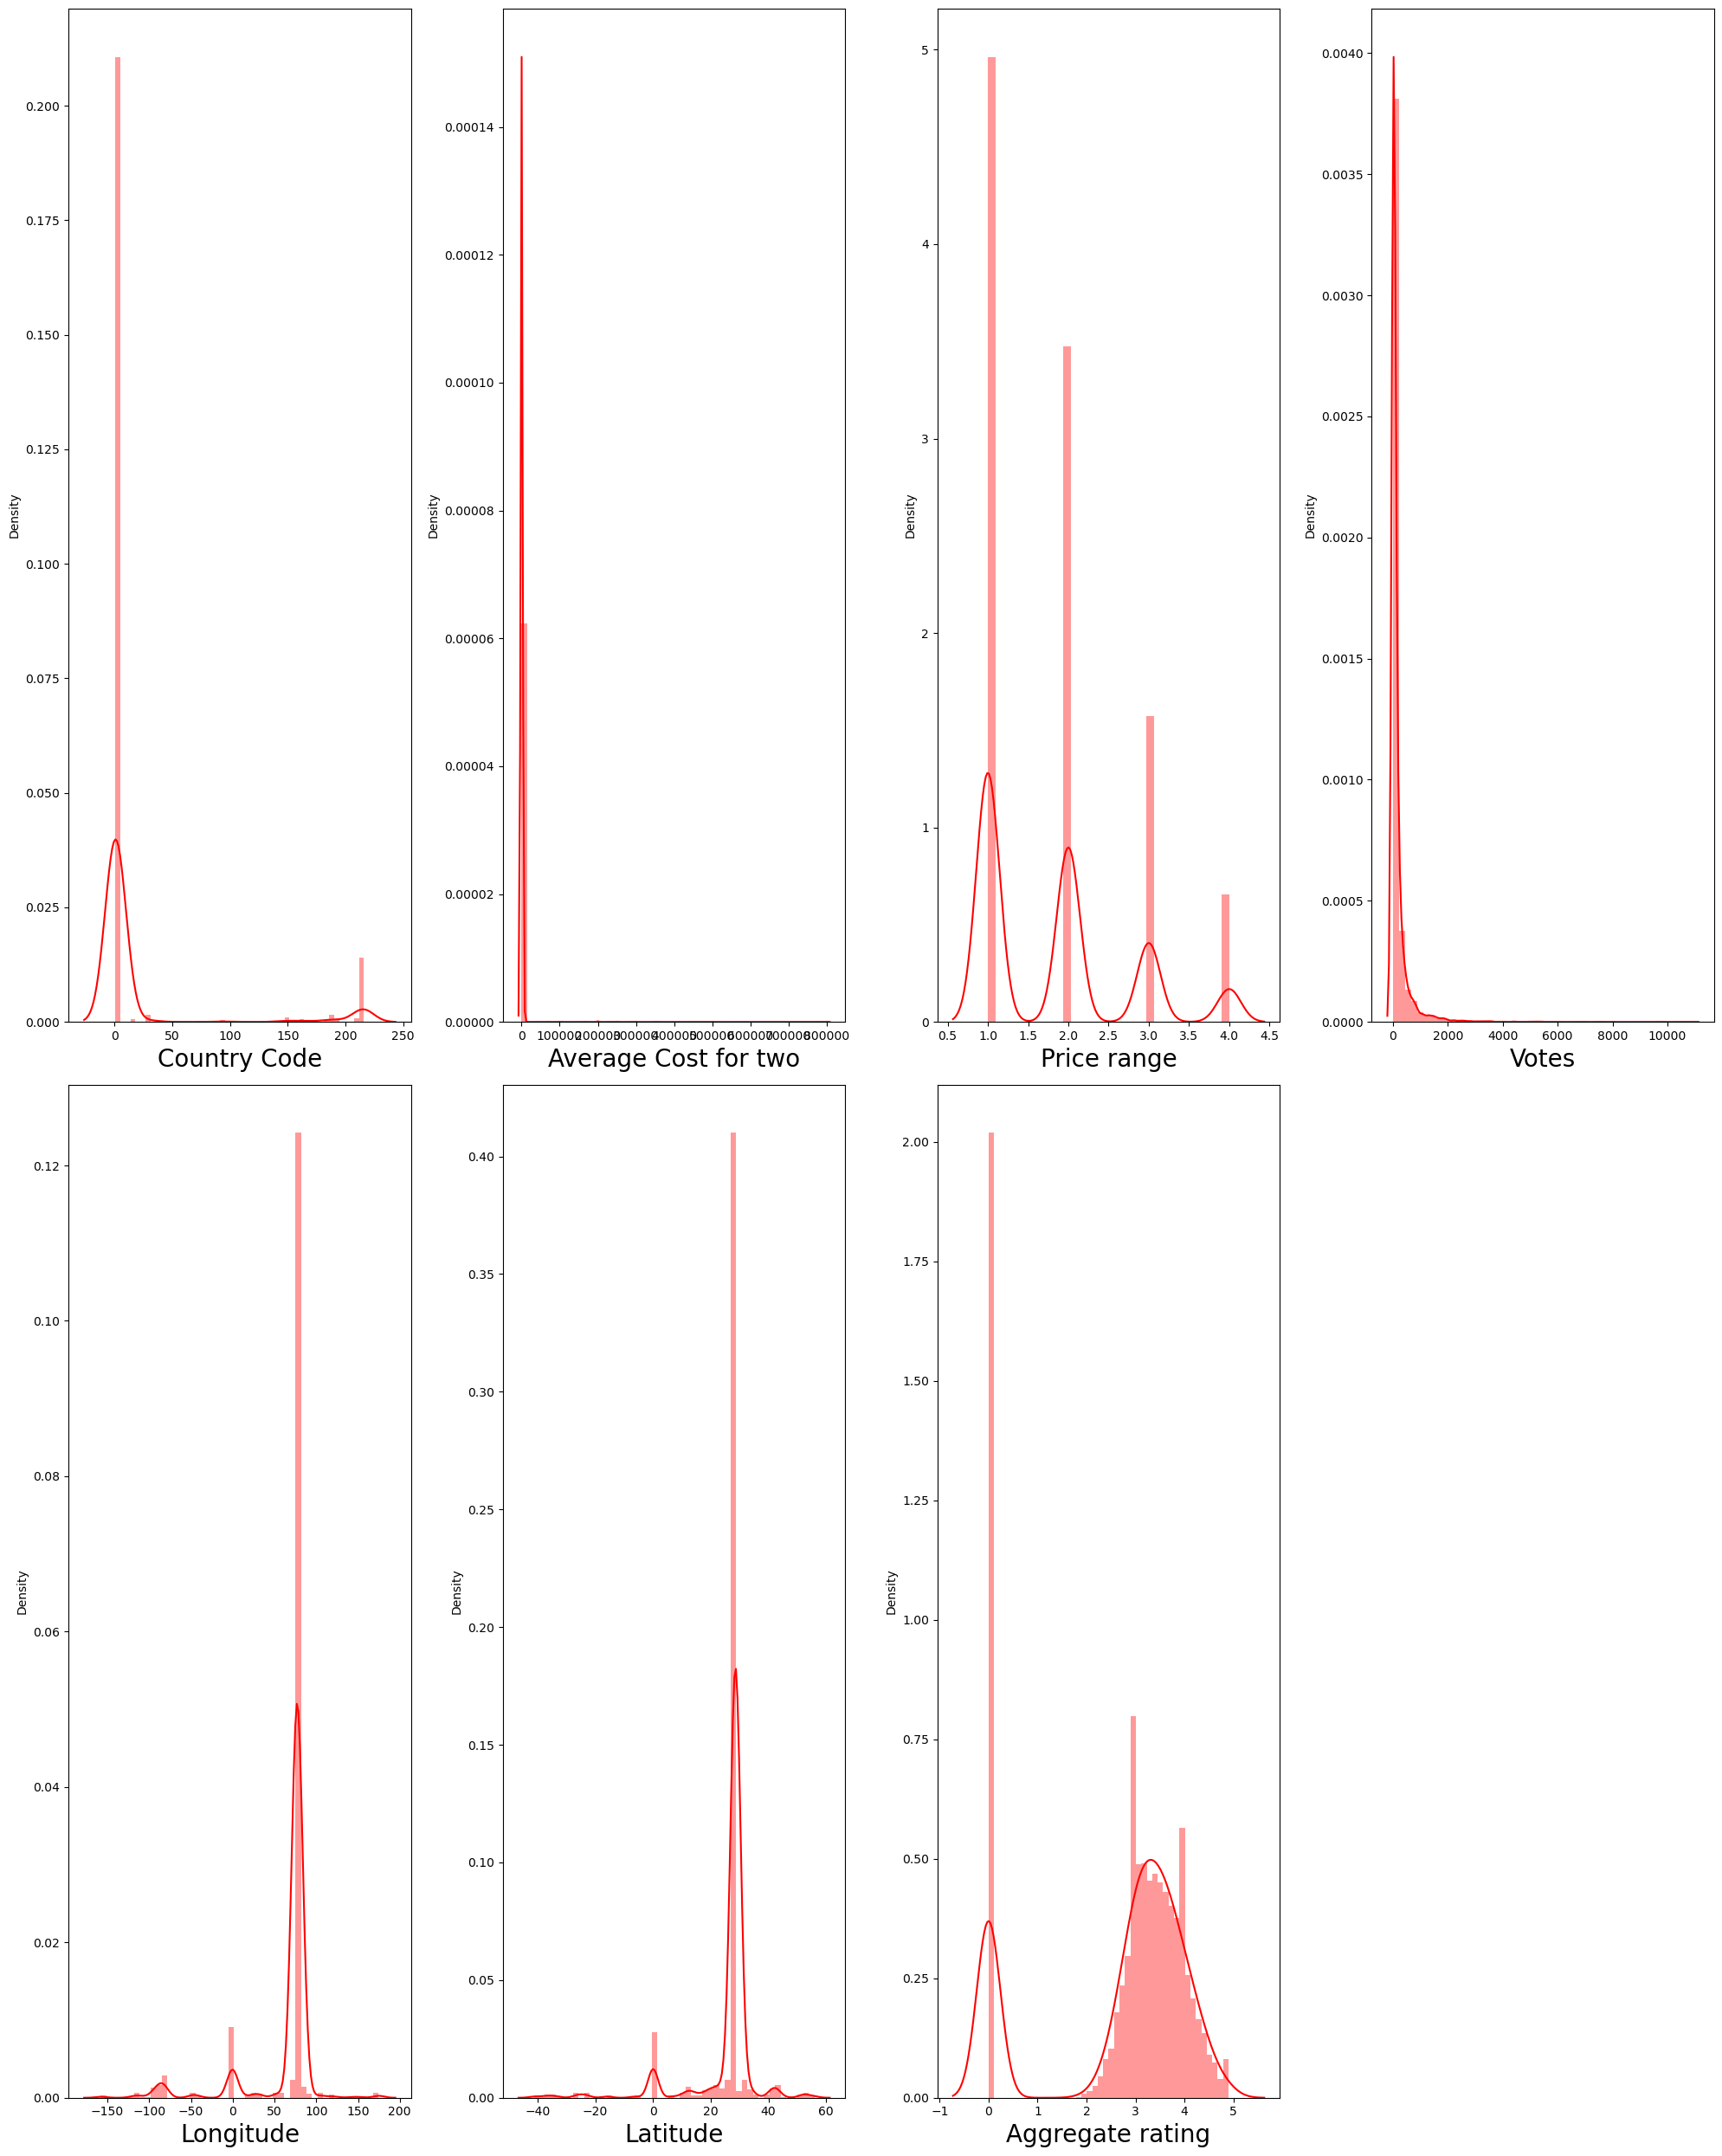

In [44]:
# checking how the data has been distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1
for col in Numerical:
    if plotnumber<=7:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[col],color='red')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### We can see that Skewness is present in the dataset

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


<Axes: title={'center': 'Average rating V/s Price range'}, xlabel='Price range', ylabel='Average of ratings'>

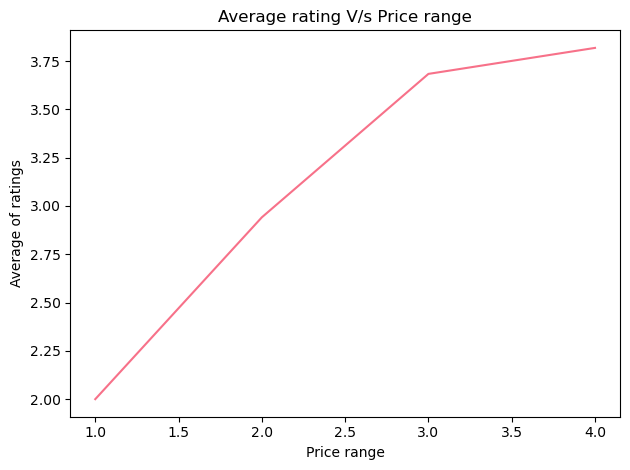

In [45]:
rating_price = data.groupby('Price range').mean()['Aggregate rating'].sort_values(ascending = True)
print(rating_price)
(rating_price).plot(kind='line', xlabel='Price range',ylabel='Average of ratings', title='Average rating V/s Price range')

#### We can see that it has a linear relationship, when we compare Aggregate rating and price range.

# Encoding Categorial Data

In [46]:
#using label encoder on target variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    data[i]=le.fit_transform(data[i])
data.head()

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749,162,73,171,172,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,0,1,314,6
1,3173,162,73,593,601,121.014101,14.553708,1111,1200,0,1,0,0,0,3,4.5,0,1,591,6
2,2897,162,75,308,314,121.056831,14.581404,1672,4000,0,1,0,0,0,4,4.4,1,5,270,6
3,4707,162,75,862,875,121.056475,14.585318,1126,1500,0,0,0,0,0,4,4.9,0,1,365,6
4,5523,162,75,862,875,121.057508,14.584450,1122,1500,0,1,0,0,0,4,4.8,0,1,229,6


# Future Selection and Enginnering

#### Outliers detection and removal

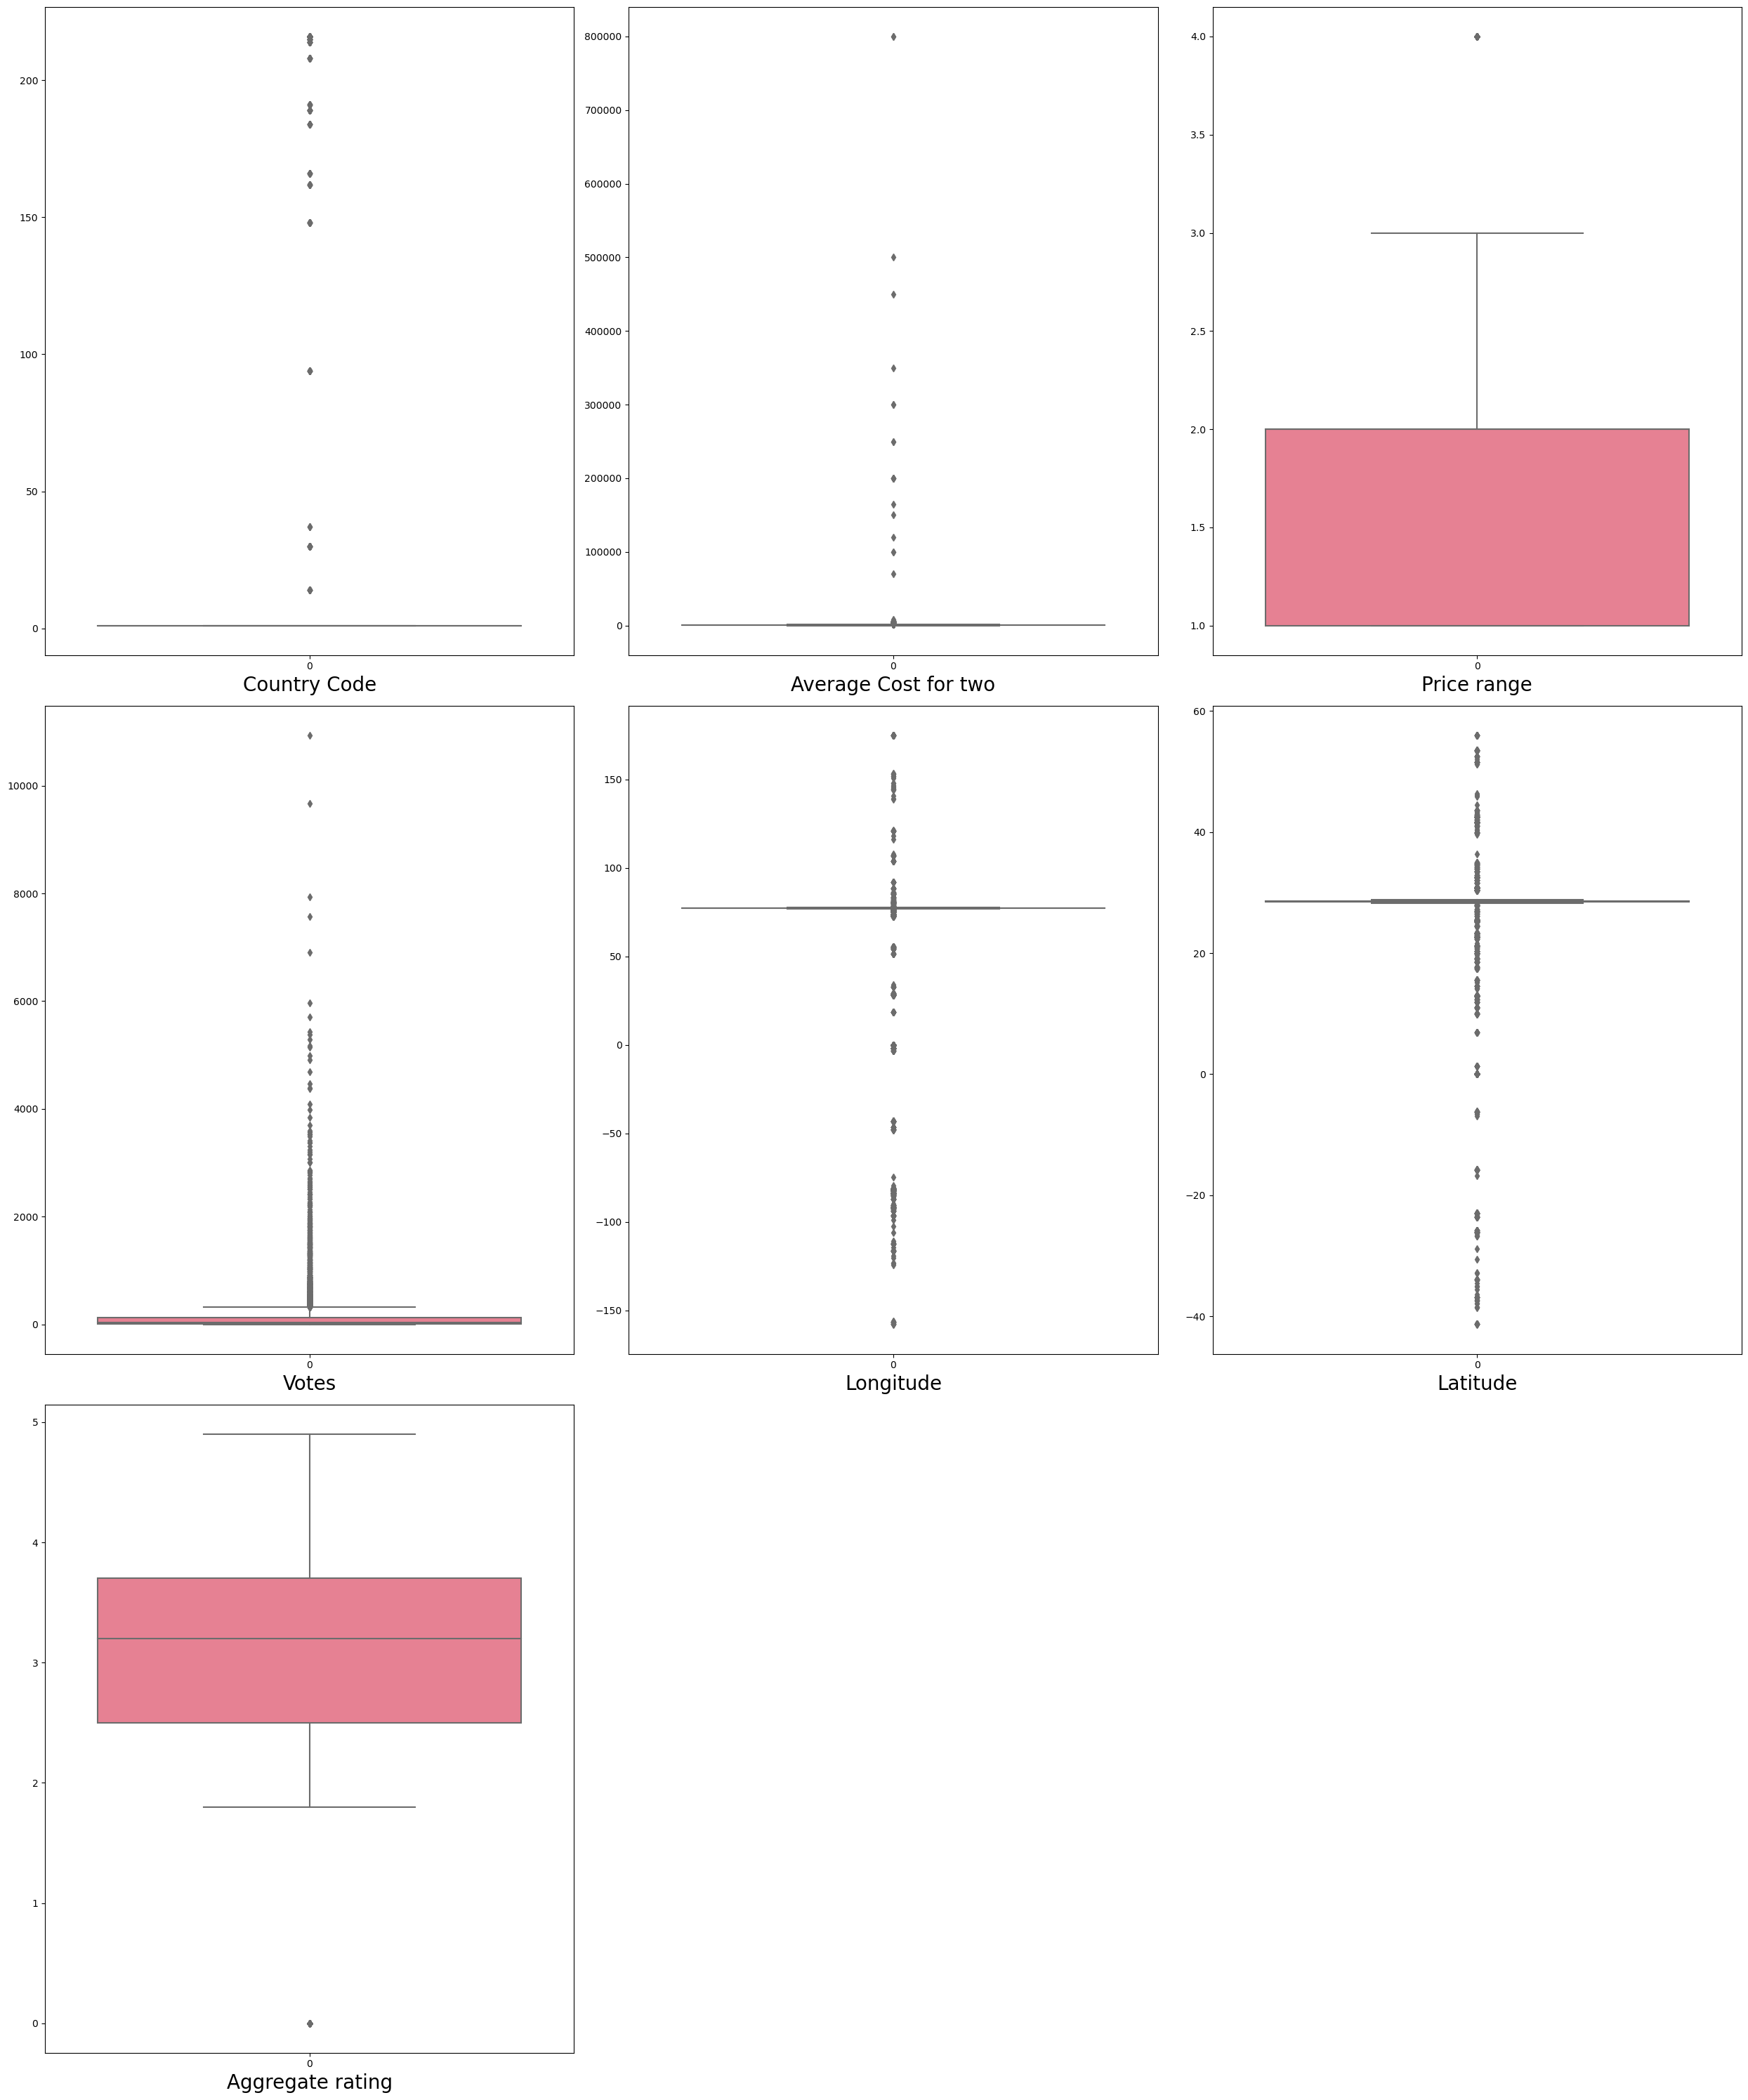

In [47]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Numerical:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

#### From boxplot we can see outliers exits datasets.

In [48]:
#Dropping unnecessary columns because these column will not contribute to target variables.

data.drop(['Switch to order menu','Restaurant Name','Is delivering now','Country'],axis = 1, inplace=True)

In [49]:
da = data.copy

In [50]:
daa = data.copy()
Q1 =daa.quantile(0)
Q3 = daa.quantile(0.85)
IQR= Q3-Q1
print(IQR)

Country Code               0.000000
City                      89.000000
Locality                 975.000000
Locality Verbose        1028.000000
Longitude                235.271751
Latitude                  70.008131
Cuisines                1521.000000
Average Cost for two    1000.000000
Currency                   4.000000
Has Table booking          0.000000
Has Online delivery        1.000000
Price range                2.000000
Aggregate rating           3.900000
Rating color               5.000000
Rating text                3.000000
Votes                    246.000000
dtype: float64


In [51]:
dataa = daa[~((daa<(Q1-1.5*IQR))).any(axis=1)]
print(dataa.shape)

(9551, 16)


In [52]:
data = dataa.copy()

# Correlation Matrix

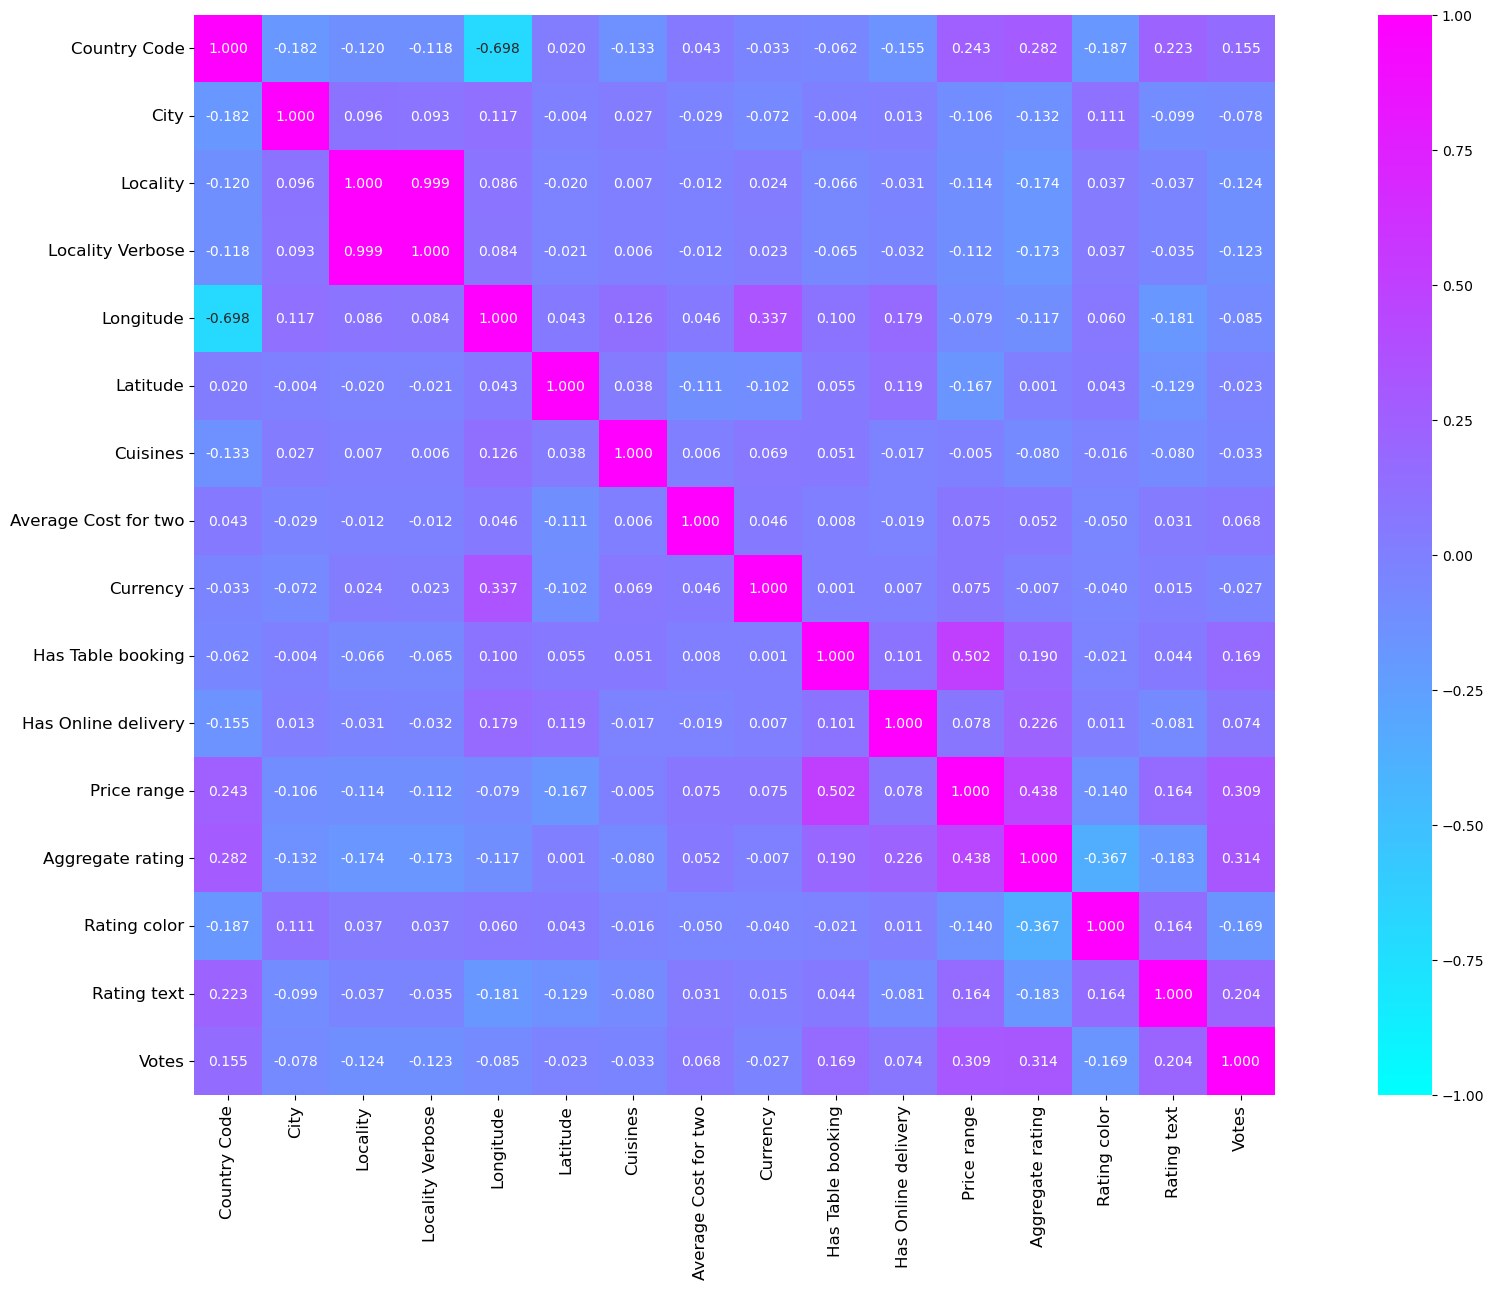

In [53]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(),vmin=-1, vmax=1,annot=True, square=True, fmt='0.3f',
           annot_kws={'size':10}, cmap = "cool")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

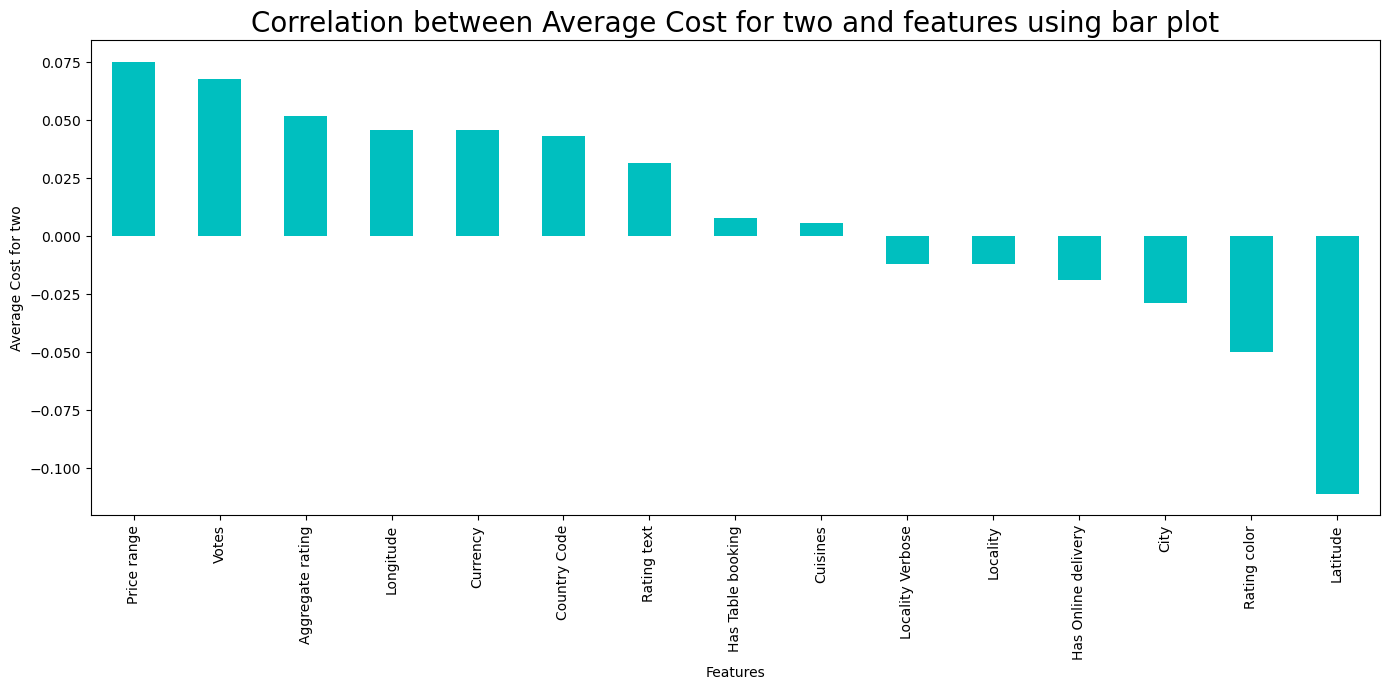

In [54]:
plt.figure(figsize=(14,7))
dataa.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Average Cost for two',fontsize = 10)
plt.title('Correlation between Average Cost for two and features using bar plot', fontsize = 20)
plt.show()

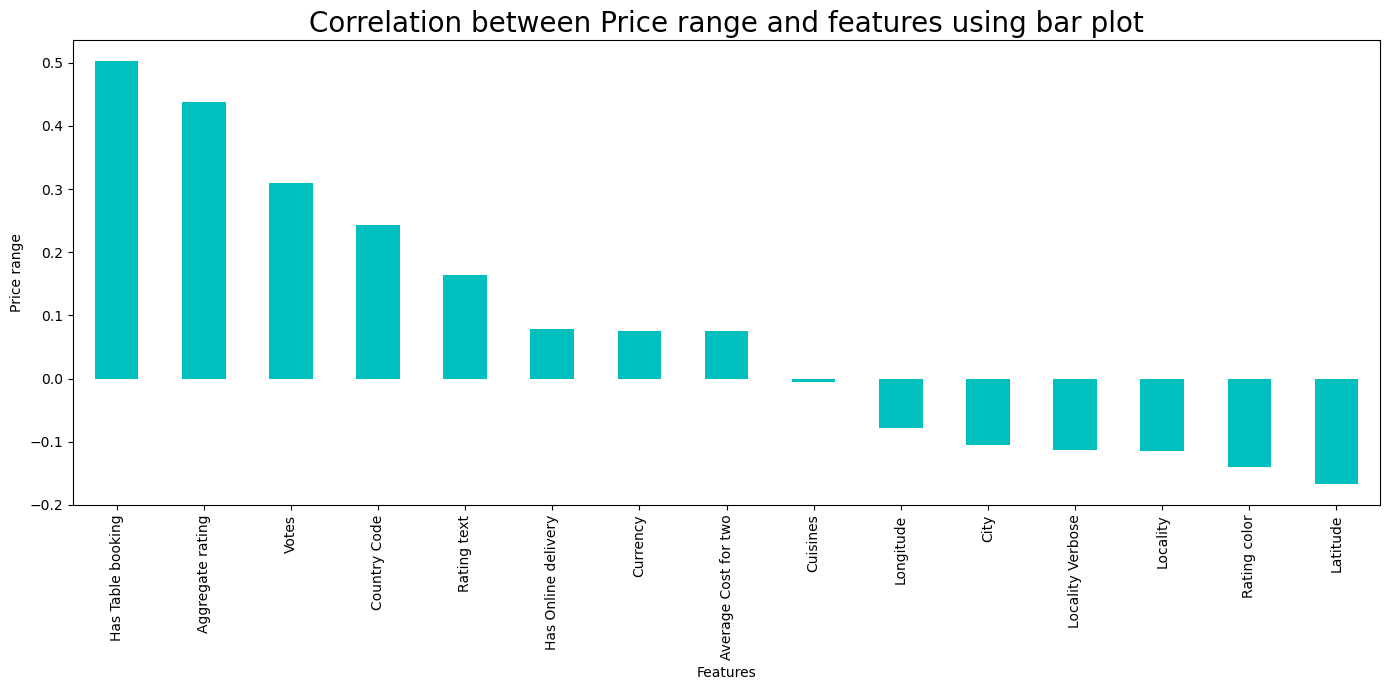

In [55]:
plt.figure(figsize=(14,7))
dataa.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Price range',fontsize = 10)
plt.title('Correlation between Price range and features using bar plot', fontsize = 20)
plt.show()

# Skewness

In [56]:
data.skew()

Country Code             3.043965
City                    -1.193777
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.306743
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
dtype: float64

In [57]:
skew = ['Country Code','Average Cost for two','Price range','Votes']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,Country Code,Average Cost for two,Price range,Votes
0,3.103272,0.974401,1.284171,1.191885
1,3.103272,1.060687,1.284171,1.507786
2,3.103272,2.302484,1.706541,1.116765
3,3.103272,1.284065,1.706541,1.266889
4,3.103272,1.284065,1.706541,1.034953


# Checking Multicollinearity between features using variance_inflation_factor

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
vif['Features']=data.columns
vif

,VIF,Features
0,3.170860,Country Code
1,11.060929,City
2,5048.612677,Locality
3,4885.178816,Locality Verbose
4,7.566219,Longitude
5,6.583145,Latitude
6,4.642287,Cuisines
7,3.342161,Average Cost for two
8,18.908693,Currency
9,1.602587,Has Table booking


# Standard Scaling

In [59]:
x = data.drop(['Average Cost for two'], axis = 1)
y = data['Average Cost for two']

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# Machine Learning And Model Learning

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.3, random_state=99)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (6685, 15)
Training target vector : (6685,)
Test feature matrix size : (2866, 15)
Test target vector size : (2866,)


# Finding best random rate

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRs=0
for i in range (1,1000):
    x_train,x_test,y_train,y_test= train_test_split(x_scale,y,test_size = .33, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    R2 = r2_score(y_test, y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score, 'on Random_state',maxRS)

Best accuracy is 0.7937515406480243 on Random_state 371


# Linear Regression

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.3,random_state=91)
lrr = LinearRegression()
lrr.fit(x_train,y_train)
lrr.score(x_train,y_train)
y_pred = lrr.predict(x_test)
print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n', y_test)

Predicted result price:
 [ 0.54576206 -0.57091298  0.38720502 ...  0.45772165 -0.49051093
 -3.30134042]


actual price
 1292    0.385864
1814    0.004239
999     0.213077
2615   -0.119352
8614   -0.260745
          ...   
6855   -0.119352
268    -1.981559
4981    0.213077
6103   -0.879626
407    -4.686725
Name: Average Cost for two, Length: 2866, dtype: float64


# Applying Other Regressor ML Algorithm

In [65]:
models =[
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    Lasso(),
    Ridge()]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Errors of ',m,'is' + '\033[0m')
    print('\n')
    print('\033[1m'+'Mean absolute error :' + '\033[0m\n',mean_absolute_error(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix' + '\033[0m \n',mean_squared_error(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report' + '\033[0m \n',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    print('\033[1m'+'R2 Score' + '\033[0m')
    print(r2_score(y_test,y_pred))
    print('*'*100)

Errors of  DecisionTreeRegressor() is


Mean absolute error :
 0.2334873076531613


Confusion Matrix 
 0.13225128808857262


Classification Report 
 0.36366370191231984


R2 Score
0.8729776299770191
****************************************************************************************************
Errors of  KNeighborsRegressor() is


Mean absolute error :
 0.25862860419930683


Confusion Matrix 
 0.1359047257348192


Classification Report 
 0.3686525813483736


R2 Score
0.869468641026782
****************************************************************************************************
Errors of  RandomForestRegressor() is


Mean absolute error :
 0.1901713860147098


Confusion Matrix 
 0.07951237376242348


Classification Report 
 0.28197938535010586


R2 Score
0.9236313664129159
****************************************************************************************************
Errors of  AdaBoostRegressor() is


Mean absolute error :
 0.3779883850231665


Confusion Matrix 
 0.257

# Cross Validation Score

In [66]:
from sklearn.model_selection import cross_val_score
model =[
    LinearRegression(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    Ridge(),
    Lasso()]
for c in model:
    score = cross_val_score(c,x,y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score',c,'is' + '\033[0m')
    print("Score",score)
    print("Mean Score :",score.mean())
    print("Std Deviation", score.std())
    print('\n')
    print('*'*100)



Cross Validation Score LinearRegression() is
Score [ 0.02679598  0.77176683  0.75059634  0.76912693 -1.24977334]
Mean Score : 0.21370254861463317
Std Deviation 0.7854785398165751


****************************************************************************************************


Cross Validation Score DecisionTreeRegressor() is
Score [-0.04546947  0.70880309  0.68866836  0.73679769 -0.04354877]
Mean Score : 0.4090501788929551
Std Deviation 0.3706455153829723


****************************************************************************************************


Cross Validation Score KNeighborsRegressor() is
Score [ 0.16963907 -0.17853948 -0.37845485 -0.31987403  0.00955893]
Mean Score : -0.13953407043957552
Std Deviation 0.20442300065941885


****************************************************************************************************


Cross Validation Score RandomForestRegressor() is
Score [-0.25967613  0.84063504  0.83456268  0.86545745  0.18143837]
Mean Score : 0.4924

# Hyper Parameter Tunning Using GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param = [{'n_estimators':[50,100],
         'criterion':['squared_error','absolute_error'],
         'max_depth':[10,20],
          'min_samples_leaf':[5,10],
          'min_samples_split':[5,10],
          'max_features':["auto","sqrt"]}]

In [69]:
gc = GridSearchCV(RandomForestRegressor(),param,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.880 total time=   1.1s
[CV 2/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.876 total time=   1.3s
[CV 3/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.883 total time=   1.1s
[CV 4/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.895 total time=   1.1s
[CV 5/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.909 total time=   1.3s
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, sc

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'criterion': ['squared_error', 'absolute_error'],
                          'max_depth': [10, 20],
                          'max_features': ['auto', 'sqrt'],
                          'min_samples_leaf': [5, 10],
                          'min_samples_split': [5, 10],
                          'n_estimators': [50, 100]}],
             verbose=5)

In [72]:
gc.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 50}

# Final Model

In [73]:
final = RandomForestRegressor(n_estimators =50,criterion= 'squared_error', max_depth = 20,max_features = 'auto',
                             min_samples_leaf  = 5,min_samples_split=10)
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Score',r2_score(y_test,y_pred))

 Final Random Forest Classifier Evaluation


Mean absolute error : 0.19249531722418833
Mean Squared error : 0.08354918501921864
Root Mean Squared error 0.2890487588958282
R2_Score 0.9197541615812309


# Pridict the final Model:-

In [74]:
# Prediction
prediction = final.predict(x_test)

In [75]:
Actual = np.array(y_test)
data_pred = pd.DataFrame()
data_pred["Predicted Values"] = prediction
data_pred["Actual Values"] = Actual
data_pred.head()

,Predicted Values,Actual Values
0,0.452390,0.385864
1,-0.553794,0.004239
2,0.332901,0.213077
3,-0.186949,-0.119352
4,-0.583212,-0.260745


# Saving the model

In [76]:
import joblib
joblib.dump(final,"Zomato_Average_Cost")

['Zomato_Average_Cost']

# Now This Time Machine Learning Model Building For Price Range Prediction

In [77]:
data.head()

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3.103272,73,171,172,121.027535,14.565443,920,0.974401,0,1,0,1.284171,4.8,0,1,1.191885
1,3.103272,73,593,601,121.014101,14.553708,1111,1.060687,0,1,0,1.284171,4.5,0,1,1.507786
2,3.103272,75,308,314,121.056831,14.581404,1672,2.302484,0,1,0,1.706541,4.4,1,5,1.116765
3,3.103272,75,862,875,121.056475,14.585318,1126,1.284065,0,0,0,1.706541,4.9,0,1,1.266889
4,3.103272,75,862,875,121.057508,14.584450,1122,1.284065,0,1,0,1.706541,4.8,0,1,1.034953


# Standard Scaling

In [78]:
x = data.drop(['Price range'], axis = 1)
y = data['Price range']

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# Machine learning Model Building For Price range

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.3, random_state=99)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (6685, 15)
Training target vector : (6685,)
Test feature matrix size : (2866, 15)
Test target vector size : (2866,)


# Find Best Random Rate

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRs=0
for i in range (1,1000):
    x_train,x_test,y_train,y_test= train_test_split(x_scale,y,test_size = .33, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    R2 = r2_score(y_test, y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score, 'on Random_state',maxRS)

Best accuracy is 0.675611614640051 on Random_state 556


# Linear regression

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.3,random_state=91)
lrr = LinearRegression()
lrr.fit(x_train,y_train)
lrr.score(x_train,y_train)
y_pred = lrr.predict(x_test)
print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n', y_test)

Predicted result price:
 [ 0.05030274 -0.33134783 -0.43251923 ... -0.16800595 -1.17486384
 -1.11430863]


actual price
 1292    0.548245
1814   -1.015939
999     0.548245
2615   -1.015939
8614   -1.015939
          ...   
6855   -1.015939
268     1.284171
4981    0.548245
6103   -1.015939
407    -1.015939
Name: Price range, Length: 2866, dtype: float64


# Applying Other Regressor Model Building

In [84]:
models =[
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    Lasso(),
    Ridge()]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Errors of ',m,'is' + '\033[0m')
    print('\n')
    print('\033[1m'+'Mean absolute error :' + '\033[0m\n',mean_absolute_error(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix' + '\033[0m \n',mean_squared_error(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report' + '\033[0m \n',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    print('\033[1m'+'R2 Score' + '\033[0m')
    print(r2_score(y_test,y_pred))
    print('='*100)

Errors of  DecisionTreeRegressor() is


Mean absolute error :
 0.017843525911233744


Confusion Matrix 
 0.01594216286570662


Classification Report 
 0.12626227807903126


R2 Score
0.9841120480255341
Errors of  KNeighborsRegressor() is


Mean absolute error :
 0.30284347020129065


Confusion Matrix 
 0.234318585642028


Classification Report 
 0.4840646502710439


R2 Score
0.76647820833561
Errors of  RandomForestRegressor() is


Mean absolute error :
 0.02010342463749176


Confusion Matrix 
 0.00790551583416672


Classification Report 
 0.08891296775030468


R2 Score
0.9921213666574186
Errors of  AdaBoostRegressor() is


Mean absolute error :
 0.14789763284297522


Confusion Matrix 
 0.053134659741486276


Classification Report 
 0.23050956540127848


R2 Score
0.9470460232238442
Errors of  GradientBoostingRegressor() is


Mean absolute error :
 0.0441823508309063


Confusion Matrix 
 0.015320655406766763


Classification Report 
 0.12377663514075168


R2 Score
0.9847314420652632
Error

# Cross Validation Score

In [85]:
from sklearn.model_selection import cross_val_score
model =[
    LinearRegression(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    Ridge(),
    Lasso()]
for c in model:
    score = cross_val_score(c,x,y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score',c,'is' + '\033[0m')
    print("Score",score)
    print("Mean Score :",score.mean())
    print("Std Deviation", score.std())
    print('\n')
    print('='*100)



Cross Validation Score LinearRegression() is
Score [ 0.1574857   0.68891151  0.66063469  0.70364478 -1.56839158]
Mean Score : 0.1284570188139086
Std Deviation 0.8727314702452302




Cross Validation Score DecisionTreeRegressor() is
Score [0.70520809 0.96098019 1.         0.99927759 0.45796787]
Mean Score : 0.82468674810327
Std Deviation 0.21379920122025287




Cross Validation Score KNeighborsRegressor() is
Score [-0.09313496 -0.05100669 -0.45733228 -0.19098875  0.12080897]
Mean Score : -0.13433074062711142
Std Deviation 0.19040818423573005




Cross Validation Score RandomForestRegressor() is
Score [0.67325442 0.97400868 0.99988608 0.99964875 0.47034707]
Mean Score : 0.8234290025960895
Std Deviation 0.21544558101860206




Cross Validation Score AdaBoostRegressor() is
Score [0.56488196 0.96950733 0.97314127 0.98350697 0.89448367]
Mean Score : 0.8771042387978166
Std Deviation 0.1592907881434576




Cross Validation Score GradientBoostingRegressor() is
Score [0.76021258 0.97270342 0.9

# Hyper-Tunning Parameter Using GridSearchCV:-

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param = [{'n_estimators':[50,100],
         'learning_rate':[0.05,0.1],
         'max_depth':[3,5],
          'subsample':[0.6,0.8]}]

In [88]:
gc = GridSearchCV(XGBRegressor(),param,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6;, score=0.967 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6;, score=0.971 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6;, score=0.965 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6;, score=0.971 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6;, score=0.971 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8;, score=0.966 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8;, score=0.972 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8;, score=0.965 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid=[{'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                          'n_estimators': [50, 100], 'subsample': [0.6, 0.8]}],
             verbose=5)

In [89]:
gc.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

# Final Model

In [90]:
final = XGBRegressor(n_estimators =100,learning_rate= 0.1, max_depth = 5,subsample = 0.8)
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Score',r2_score(y_test,y_pred))

 Final Random Forest Classifier Evaluation


Mean absolute error : 0.023951776424611836
Mean Squared error : 0.006929697189175131
Root Mean Squared error 0.0832448027757597
R2_Score 0.9930938670576475


# Predict the final model

In [91]:
# Prediction
prediction = final.predict(x_test)

In [92]:
Actual = np.array(y_test)
data_pred = pd.DataFrame()
data_pred["Predicted Values"] = prediction
data_pred["Actual Values"] = Actual
data_pred.head()

,Predicted Values,Actual Values
0,0.544922,0.548245
1,-1.012535,-1.015939
2,0.549097,0.548245
3,-1.016814,-1.015939
4,-1.015788,-1.015939


# Saving the model

In [93]:
import joblib
joblib.dump(final,"Zomato_Price_range")

['Zomato_Price_range']